# Naive SIR model (without demographics)

In [84]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# infection and recovery rates (include a legend in report)
rlambda = 0.01
rgamma = 0.2

In [86]:
# population size
N = 1000

# starting number of susceptible (X), infected (Y) and recovered (Z)
Y0 = 1
X0 = N - Y0
Z0 = 0

XYZ = [X0, Y0, Z0]

In [87]:
# delta t
step = 0.01

# run iterations
run_iter = 100000

# iteration function
def iterate(X_in, Y_in, Z_in, rl, rg):
    delta_x = -rl*X_in
    delta_y = rl*X_in - rg*Y_in
    delta_z = rg*Y_in
    # Simple Euler method
    X_out = X_in + delta_x*step
    Y_out = Y_in + delta_y*step
    Z_out = Z_in + delta_z*step
    return [X_out, Y_out, Z_out]

In [89]:
#%%timeit

XYZ_track = np.array([XYZ])
for i in range(run_iter):
    #print(XYZ)
    XYZ_current = iterate(XYZ[0], XYZ[1], XYZ[2], rlambda, rgamma)
    XYZ_track = np.append(XYZ_track, [XYZ_current], axis=0)
    XYZ = XYZ_current

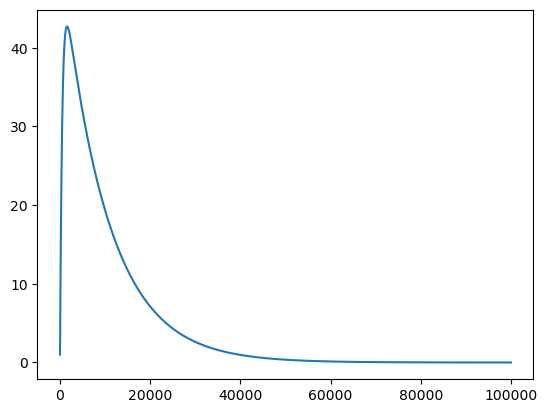

In [90]:
np.shape(XYZ_track)
#print(XYZ_track)
#print(np.transpose(XYZ_track))

##for xyz in XYZ_track:
##    print(xyz[0]+xyz[1]+xyz[2])

plt.plot(np.transpose(XYZ_track)[1])